<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/8_Housing%20price%20Keras%20Dense%20Regression%20model%20with%20grid%20search%20hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

**CRIM - per capita crime rate by town**

**ZN - proportion of residential land zoned for lots over 25,000 sq.ft.**

**INDUS - proportion of non-retail business acres per town.**

**CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)**

**NOX - nitric oxides concentration (parts per 10 million)**

**RM - average number of rooms per dwelling**

**AGE - proportion of owner-occupied units built prior to 1940**

**DIS - weighted distances to five Boston employment centres**

**RAD - index of accessibility to radial highways**

**TAX - full-value property-tax rate per $10,000**

**PTRATIO - pupil-teacher ratio by town**

**B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town**

**LSTAT - % lower status of the population**

## **Trget column -->> MEDV - Median value of owner-occupied homes in $1000's**


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path='https://raw.githubusercontent.com/rohailkhan/data/main/BostonHousing.csv'
housing=pd.read_csv(path)
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing.shape

(506, 14)

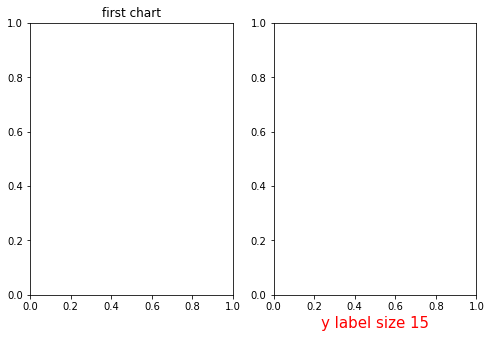

In [ ]:

fig, axes = plt.subplots( 1,2, figsize=(8,5)) # matplot part for defining figure and no of axes(plots)

axes[0].set_title('first chart')
axes[1].set_xlabel('y label size 15',color='r',size=15)
plt.show()

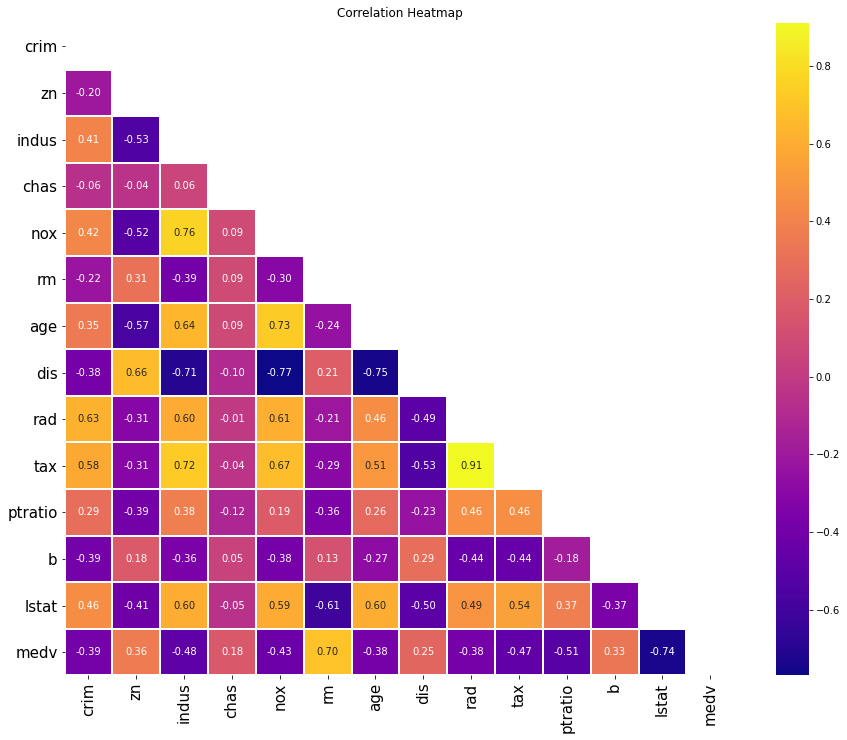

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))
mask = np.triu(housing.corr())
# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(housing.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')

plt.yticks(rotation = 0,size=15)
plt.xticks(rotation = 90,size=15)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
Y=housing.iloc[:,13]
X=housing.iloc[:,0:13]

In [ ]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We will check cross validation score using:

**cross_val_score ( pipeline[standardization & regression) , X , Y , CV=(Kfold or Startified)**

Linear regression will be used Keras Linear regression API having build= basic deep learning model 


In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import KFold


## Basic Deep Learning Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

### important  No activation function is used for the output layer because it is a regression

### 1- Base Sequential Model

In [ ]:
def base_model():
  model=Sequential()
  model.add(Dense(13,input_dim==13,activation='relu',kernel_initializer='glorot_uniform')) # or input_shape=(13,) because only 1 dimentions
  model.add(Dense(64,activation='relu',kernel_initializer='glorot_uniform'))
  model.add(Dense(1,kernel_initializer='glorot_uniform'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model
# fix random seed for reproducibility
import numpy
seed = 7
numpy.random.seed(seed)

### 2- Standardization and Regression 

Note : In KerasRegressor all parameters of Sequential.fit() can be used i.e:
https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit 

fit(    
    x=None,
    
    y=None, 
    
    batch_size=None, 
    
    epochs=1 etc
)

In [ ]:
estimators=[ ('STANDARDIZE' , StandardScaler()) , ('KeraRegressor' , KerasRegressor(build_fn=base_model , epochs=50 ,batch_size=5,verbose=0))]


### 3- Adding steps (i.e Standardization & Regression) to Pipeline


In [ ]:
pipe=Pipeline(steps=estimators)

## 4- Cross Validation Score with KFold as cross validation

In [ ]:
# results =cross_val_score( estimator=pipe , X=X , y=y , cv = KFold(n_splits=5, shuffle=True ,random_state=seed))

### All steps together

In [ ]:
def base_model():
  model=Sequential()
  model.add(Dense(13,input_dim=13,activation='relu',kernel_initializer='uniform')) # or input_dim=3 because only 1 dimentions
  model.add(Dense(64,activation='relu',kernel_initializer='uniform'))
  model.add(Dense(1,kernel_initializer='glorot_uniform'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model
# fix random seed for reproducibility
import numpy
seed = 7
numpy.random.seed(seed)

estimators=[ ('STANDARDIZE' , StandardScaler()) , ('KeraRegressor' , KerasRegressor(build_fn=base_model , epochs=50 ,batch_size=5,verbose=0))]

pipe=Pipeline(steps=estimators)


results =cross_val_score( estimator=pipe , X=X , y=Y , cv = KFold(n_splits=5, shuffle=True ,random_state=seed))


In [ ]:
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -13.42 (4.30) MSE


## Using a  wider model with 20 input Neurons

In [ ]:
def wide_model():
  model=Sequential()
  model.add(Dense(20,input_dim=13,activation='relu',kernel_initializer='uniform')) # or input_dim=3 because only 1 dimentions
  model.add(Dense(64,activation='relu',kernel_initializer='uniform'))
  model.add(Dense(1,kernel_initializer='glorot_uniform'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model
  
# fix random seed for reproducibility
import numpy
seed = 7
numpy.random.seed(seed)

estimators=[ ('STANDARDIZE' , StandardScaler()) , ('KeraRegressor' , KerasRegressor(build_fn=wide_model , epochs=50 ,batch_size=5,verbose=0))]

pipe=Pipeline(steps=estimators)


results =cross_val_score( estimator=pipe , X=X , y=Y , cv = KFold(n_splits=5, shuffle=True ,random_state=seed))


In [ ]:
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std())) #Standardized: -15.15 (5.33) MSE

Standardized: -13.27 (4.42) MSE


In [ ]:
def wide_model():
  model=Sequential()
  model.add(Dense(20,input_dim=13,activation='relu',kernel_initializer='uniform')) # or input_dim=3 because only 1 dimentions
  model.add(Dense(64,activation='relu',kernel_initializer='uniform'))
  model.add(Dense(1,kernel_initializer='glorot_uniform'))
  model.compile(loss='mae', optimizer='adam',metrics=['mae'])
  return model
  
# fix random seed for reproducibility
import numpy
seed = 7
numpy.random.seed(seed)

estimators=[ ('STANDARDIZE' , StandardScaler()) , ('KeraRegressor' , KerasRegressor(build_fn=wide_model , epochs=50 ,batch_size=5,verbose=0))]

pipe=Pipeline(steps=estimators)


results =cross_val_score( estimator=pipe , X=X , y=Y , cv = KFold(n_splits=5, shuffle=True ,random_state=seed))



In [ ]:
print("Standardized: %.2f (%.2f)Mean Absolute Error" % (results.mean(), results.std())) 

Standardized: -2.52 (0.29) MSE


## Tuning Hyper Parameters with Grid search CV

In [ ]:
def create_model_grid(activation = 'relu', 
                      optimizer='rmsprop', 
                      init='glorot_uniform'):
  model=Sequential()
  model.add(Dense(20,input_dim=13,activation='relu',kernel_initializer='uniform')) # or input_dim=3 because only 1 dimentions
  model.add(Dense(64,activation='relu',kernel_initializer='uniform'))
  model.add(Dense(1,kernel_initializer='glorot_uniform'))
  model.compile(loss='mae', optimizer='rmsprop',metrics=['mae'])
  return model
  
# fix random seed for reproducibility
import numpy
seed = 7
numpy.random.seed(seed)




In [ ]:
activations = ['tanh','relu','sigmoid']
optimizers = ['rmsprop', 'adam','sgd']
initializers = ['glorot_uniform', 'normal', 'uniform']
epochs = [5,10,25]
batches = [8,16,64]

In [ ]:
param_grid = dict(activation =  activations,
                  optimizer=optimizers, 
                  epochs=epochs, 
                  batch_size=batches, 
                  init=initializers)

In [ ]:
model_grid = KerasRegressor(build_fn=create_model_grid,verbose=0)

In [ ]:
grid = GridSearchCV(estimator=model_grid , 
                    param_grid=param_grid,
                    cv = 3,
                    verbose=2,)

In [ ]:
X.shape

(506, 13)

In [ ]:
from sklearn.preprocessing import minmax_scale
X=X.astype('float')
Y=Y.astype('float')

In [ ]:
X=minmax_scale(X)

In [ ]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
grid_result = grid.fit(X, Y)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=rmsprop 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=rmsprop, total=   1.1s
[CV] activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=rmsprop 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=rmsprop, total=   1.0s
[CV] activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=rmsprop 
[CV]  activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=rmsprop, total=   1.0s
[CV] activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=adam 
[CV]  activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=adam, total=   1.1s
[CV] activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=adam 
[CV]  activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=adam, total=   1.0s
[CV] activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=adam 
[CV]  activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=adam, total=   1.0s
[CV] activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=sgd 
[CV]  activation=tanh, batch_size=8, epochs=5, init=glorot_uniform, optimizer=sgd, tota

[Parallel(n_jobs=1)]: Done 729 out of 729 | elapsed: 13.8min finished


In [ ]:
# print("Standardized: %.2f (%.2f)Mean Absolute Error" % (results_rmsprop.mean(), results_rmsprop.std())) 

Standardized: -2.44 (0.31)Mean Absolute Error


In [ ]:
print("Best accuracy: {}\nBest combination: {}".format(grid_result.best_score_, 
                             grid_result.best_params_))

Best accuracy: -4.726509094238281
Best combination: {'activation': 'sigmoid', 'batch_size': 8, 'epochs': 25, 'init': 'uniform', 'optimizer': 'rmsprop'}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [ ]:
d=pd.DataFrame(params)
d['Mean']=means
d['Std. Dev']=stds

In [ ]:
d.head()

,activation,batch_size,epochs,init,optimizer,Mean,Std. Dev
0,tanh,8,5,glorot_uniform,rmsprop,-10.261402,3.662373
1,tanh,8,5,glorot_uniform,adam,-9.730628,3.236500
2,tanh,8,5,glorot_uniform,sgd,-9.738197,3.412509
3,tanh,8,5,normal,rmsprop,-10.475887,3.567506
4,tanh,8,5,normal,adam,-10.095964,3.593640


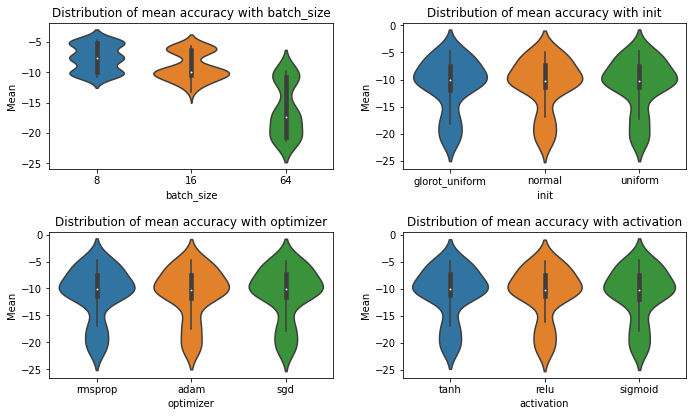

In [ ]:
param_ = ['batch_size','init','optimizer','activation']
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(10,6), squeeze=False)
ax = ax.ravel()
for i in range(4):
    ax[i].set_title('Distribution of mean accuracy with {}'.format(param_[i]))
    sns.violinplot(x=param_[i],y='Mean',data=d,ax=ax[i])
fig.tight_layout(pad=1.5)

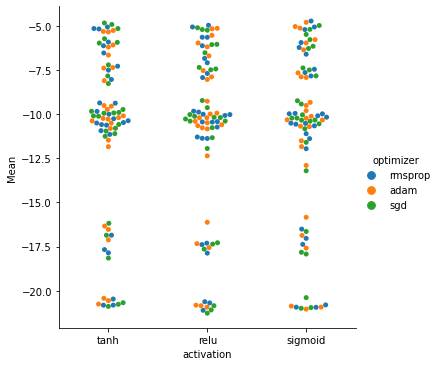

In [ ]:
sns.catplot(x="activation", y="Mean", hue="optimizer", kind="swarm", data=d)
plt.show()

## Important note

'accuracy' metric is used only for classification.
Also confusion matrix is only for classification